In [ ]:
!pip uninstall tensorflow


Found existing installation: tensorflow 2.8.2+zzzcolab20220629235552
Uninstalling tensorflow-2.8.2+zzzcolab20220629235552:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220629235552.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220629235552


In [ ]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 22 kB/s 
     |████████████████████████████████| 463 kB 33.1 MB/s 
     |████████████████████████████████| 1.3 MB 53.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3


In [ ]:
!pip install tensorflow-gpu==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 489.6 MB 19 kB/s 


In [ ]:
!nvidia-smi 

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import pandas as pd
import numpy as np
import seaborn as sns

Mounted at /content/drive/


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:

# re-size all the images to this
IMAGE_SIZE = [100, 100]

train_path = '/content/drive/MyDrive/Fyp Dataset (rar file extraction)/DATASET/train'
valid_path = '/content/drive/MyDrive/Fyp Dataset (rar file extraction)/DATASET/validation'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

#resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Fyp Dataset (rar file extraction)/DATASET/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [ ]:
prediction = Dense(len(folders), activation='sigmoid')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
import cv2
image_array = cv2.equalizeHist(image_array)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( horizontal_flip=True,rotation_range=90,rescale = 1./255)

test_datagen = ImageDataGenerator( horizontal_flip=True,rotation_range=90,rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Fyp Dataset (rar file extraction)/DATASET/train',
                                                 target_size = (100, 100),
                                                 batch_size = 500,
                                                 class_mode = 'categorical')

Found 42210 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Fyp Dataset (rar file extraction)/DATASET/validation',
                                            target_size = (100, 100),
                                            batch_size = 500,
                                            class_mode = 'categorical')

Found 9048 images belonging to 2 classes.


In [ ]:
#os.listdir(checkpoint_dir)
import os
#os.mkdir('/content/drive/MyDrive/VGG16 Model')
#os.mkdir('/content/drive/MyDrive/VGG16 Model/wgan Checkpoint')
os.mkdir('/content/drive/MyDrive/VGG16 Model/wgan Checkpoint/training 1-10')


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os


checkpoint_path = ("/content/drive/MyDrive/VGG16 Model/wganCheckpoint/training 1-10/weights-improvement-{epoch:02d}-fval_acc:.2f.hdf5")
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq=1)

In [ ]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks= [cp_callback]
)
model.save("/content/drive/MyDrive/VGG16 Model/VGG16_wgan_Model.h5")

Epoch 1/10
85/85 [==============================] - 14645s 172s/step - loss: 0.3842 - accuracy: 0.8480 - val_loss: 0.2209 - val_accuracy: 0.9398
Epoch 2/10
85/85 [==============================] - 593s 7s/step - loss: 0.2110 - accuracy: 0.9386 - val_loss: 0.1718 - val_accuracy: 0.9467
Epoch 3/10
85/85 [==============================] - 583s 7s/step - loss: 0.1655 - accuracy: 0.9536 - val_loss: 0.1411 - val_accuracy: 0.9592
Epoch 4/10
85/85 [==============================] - 584s 7s/step - loss: 0.1407 - accuracy: 0.9620 - val_loss: 0.1207 - val_accuracy: 0.9689
Epoch 5/10
85/85 [==============================] - 581s 7s/step - loss: 0.1244 - accuracy: 0.9658 - val_loss: 0.1137 - val_accuracy: 0.9688
Epoch 6/10
85/85 [==============================] - 585s 7s/step - loss: 0.1152 - accuracy: 0.9692 - val_loss: 0.1022 - val_accuracy: 0.9738
Epoch 7/10
85/85 [==============================] - 579s 7s/step - loss: 0.1052 - accuracy: 0.9727 - val_loss: 0.0977 - val_accuracy: 0.9749
Epoch 8/1

In [ ]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError
import shutil 

path = Path("/content/drive/MyDrive/Fyp Dataset (rar file extraction)/test/P").rglob("*.png")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img)
            print(path+"/"+img_p)
            #shutil.move(path+"/"+img_p)


In [ ]:
shutil.move("/content/drive/MyDrive/Fyp Dataset (rar file extraction)/test/P/generated_img_128x128_e12804.png", "/content/drive/MyDrive")


'/content/drive/MyDrive/generated_img_128x128_e12804.png'

In [ ]:
#model.summary()
from tensorflow.keras.models import load_model


# save the whole model
model.save("/content/drive/MyDrive/Resnet Model/model1_resnet50.h5")

In [ ]:
#%tensorboard --logdir logs/fit

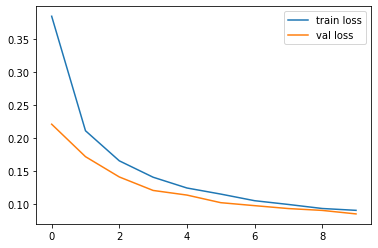

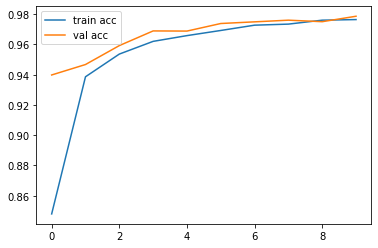

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/wgan_vgg16History.csv')


import matplotlib.pyplot as plt
# plot the loss
plt.plot(df['loss'], label='train loss')
plt.plot(df['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(df['accuracy'], label='train acc')
plt.plot(df['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('VGG16 AccVal_acc')

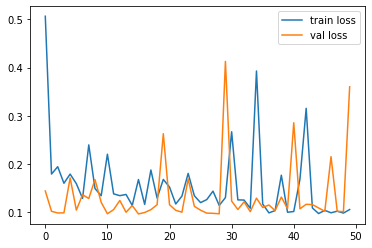

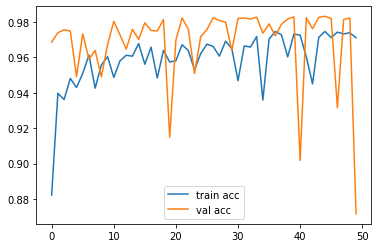

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

In [5]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [6]:
model=load_model('/content/drive/MyDrive/VGG16 Model/VGG16_wgan_Model.h5')
#model=load_model('/content/drive/MyDrive/Xception Model/model_xception.h5')

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_set = valid_datagen.flow_from_directory('/content/drive/MyDrive/Fyp Dataset (rar file extraction)/test',
                                                    target_size=(100,100),
                                                    batch_size=100,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical" 
                                            )

Found 9064 images belonging to 2 classes.


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['No Finding', 'Pneumonia']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix
[[2264 2236]
 [2313 2251]]
Classification Report
              precision    recall  f1-score   support

  No Finding       0.49      0.50      0.50      4500
   Pneumonia       0.50      0.49      0.50      4564

    accuracy                           0.50      9064
   macro avg       0.50      0.50      0.50      9064
weighted avg       0.50      0.50      0.50      9064



In [ ]:
cm=confusion_matrix(test_set.classes, y_pred)

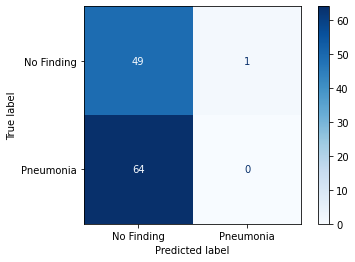

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()